In [205]:
from torch.utils.data import Dataset
import xml.etree.ElementTree as ET
import numpy as np
from PIL import Image
import sys
import os

In [206]:
def getData(imagesP, masksP, xmlP):
    s=[]
    listnames=[name.split('.tif')[0] for name in os.listdir(imagesP)]
    for name in listnames:
        d={'ImageP':imagesP+name+'.tif',
           'MaskP': masksP+name+'_M.tif',
           'xmlP': xmlP+name+'.xml'}
        s.append(d)
    return(s)

In [269]:
class CancerDataset(Dataset):
    def __init__(self, listP, patch_size, image_aug=None, mask_aug=None):
        self.listP=listP
        self.patch_size=patch_size
        self.image_aug=image_aug
        self.mask_aug=mask_aug
    
    def __len__(self):
        return(len(self.listP))
    
    def getSlides(self, index, X, Y):
        if '../ASAP 1.9/bin/' not in sys.path:
            sys.path.append('../ASAP 1.9/bin/')
        import multiresolutionimageinterface as mir
        reader = mir.MultiResolutionImageReader()
        image = reader.open(self.listP[index]['ImageP'])
        import openslide
        slide = openslide.OpenSlide(self.listP[index]['ImageP'])
        mask = openslide.OpenSlide(self.listP[index]['MaskP'])
        slide_r = slide.read_region(location=(X-self.patch_size[0]//2, Y-self.patch_size[1]//2), 
                                    level=4, size=self.patch_size)
        slide_r = slide_r.convert('RGB')
        mask_r = mask.read_region(location=(X-self.patch_size[0]//2, Y-self.patch_size[1]//2),
                                  level=4, size=self.patch_size)
        mask_r = np.array(mask_r)
        mask_r = mask_r[:, :, 0]
        mask_r = Image.fromarray(np.uint8(mask_r)*255)
        mask_r=mask_r.convert('L')
        
        return(slide_r, mask_r)
    
    def getXY(self, index):
        path=self.listP[index]['xmlP']
        tree = ET.parse(path)
        root = tree.getroot()
        coord = [elem.attrib for elem in root.iter() if 'X' in elem.attrib]
        coord = np.random.choice(coord, 1)
        X = int(float(coord[0]['X']))
        Y = int(float(coord[0]['Y']))
        
        return(coord)

In [234]:
s=getData('../Data/Originals/', '../Data/Masks/', '../Data/Annotation/')[26]

In [235]:
s=[s]

In [271]:
gen=CancerDataset(s, (512,512))

In [244]:
coord=gen.getXY(0)

In [272]:
slide, mask=gen.getSlides(0,9025,50261)

In [246]:
len(coord)

1662

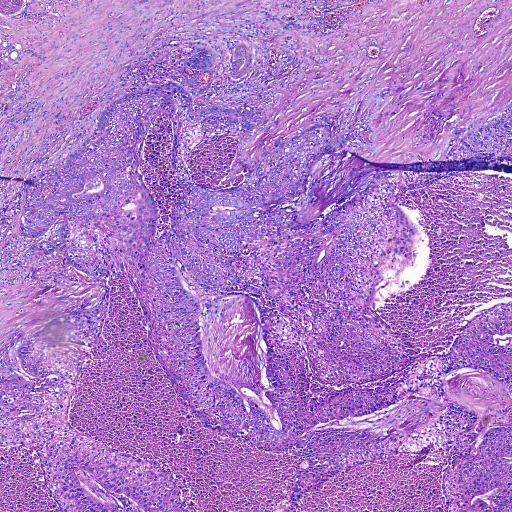

In [273]:
slide

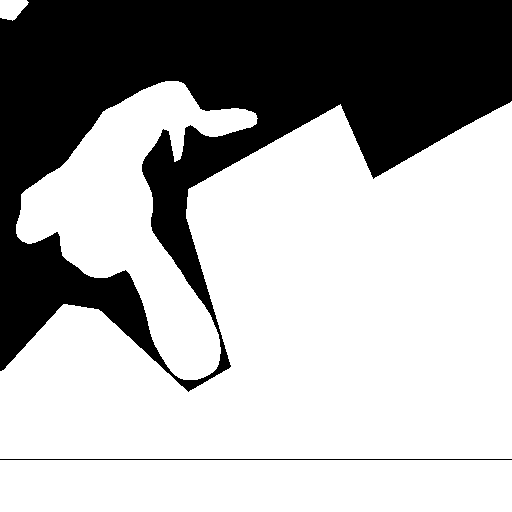

In [274]:
mask